Tackle the Titanic dataset. A great place to start is on Kaggle.

### Download Dataset

In [4]:
from kaggle.api.kaggle_api_extended import KaggleApi
import zipfile
import os

api = KaggleApi()
api.authenticate()

competition = 'titanic'
download_path = './datasets'
api.competition_download_files(competition, path=download_path)

file_name = 'titanic.zip'
z = zipfile.ZipFile(os.path.join(download_path, file_name), "r")
z.extractall(download_path)
z.close

<bound method ZipFile.close of <zipfile.ZipFile filename='./datasets\\titanic.zip' mode='r'>>

### Load Data

In [5]:
import os
import pandas as pd

folder_path = './datasets'
filename_train = 'train.csv'
filename_test = 'test.csv'
filename_gender = 'gender_submission.csv'

train = pd.read_csv(os.path.join(folder_path, filename_train))
test = pd.read_csv(os.path.join(folder_path, filename_test))
gender = pd.read_csv(os.path.join(folder_path, filename_gender))

In [9]:
gender

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


### EDA 

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
200,201,0,3,"Vande Walle, Mr. Nestor Cyriel",male,28.0,0,0,345770,9.5,NaN,S
257,258,1,1,"Cherry, Miss. Gladys",female,30.0,0,0,110152,86.5,B77,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S
238,239,0,2,"Pengelly, Mr. Frederick William",male,19.0,0,0,28665,10.5,NaN,S
46,47,0,3,"Lennon, Mr. Denis",male,NaN,1,0,370371,15.5,NaN,Q


In [20]:
print(train[train.Survived == 1]["PassengerId"].count())
print(train[train.Survived == 0]["PassengerId"].count())

342
549


Text(0, 0.5, 'Count')

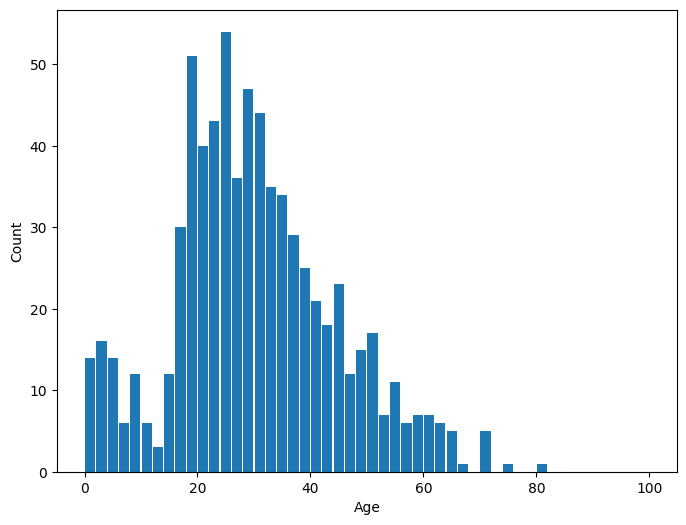

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(train.Age, bins=50, range=(0,100), rwidth=0.9)
plt.xlabel("Age")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

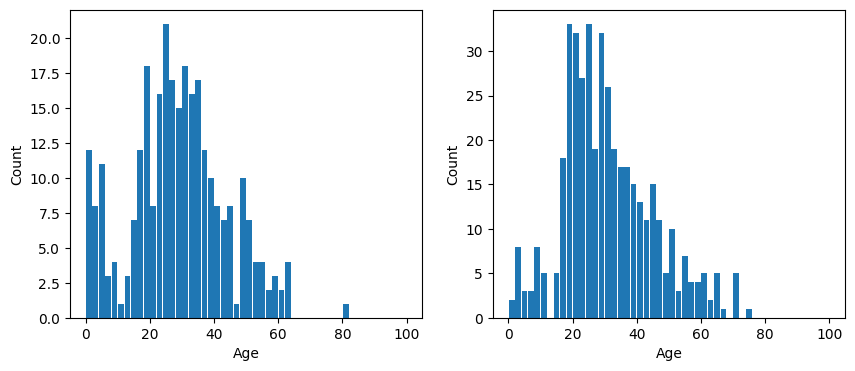

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.hist(train[train.Survived == 1].Age, bins=50, range=(0,100), rwidth=0.9)
plt.xlabel("Age")
plt.ylabel("Count")

plt.subplot(1, 2, 2)
plt.hist(train[train.Survived == 0].Age, bins=50, range=(0,100), rwidth=0.9)
plt.xlabel("Age")
plt.ylabel("Count")

([<matplotlib.axis.XTick at 0x25d67f2cb90>,
 [Text(1, 0, 'First Class'),
  Text(2, 0, 'Second Class'),
  Text(3, 0, 'Third Class')])

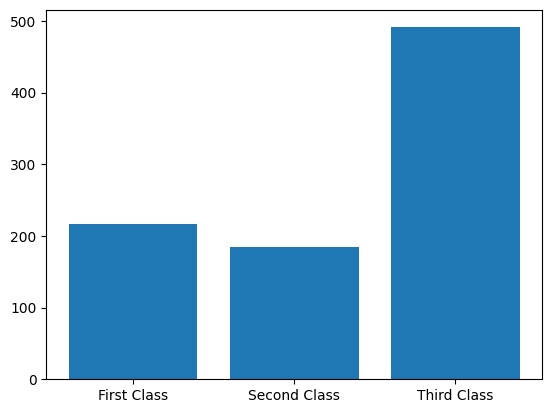

In [38]:
counts = train["Pclass"].value_counts()
plt.bar(counts.index, counts.values)
plt.xticks([1, 2, 3], ["First Class", "Second Class", "Third Class"])

<BarContainer object of 2 artists>

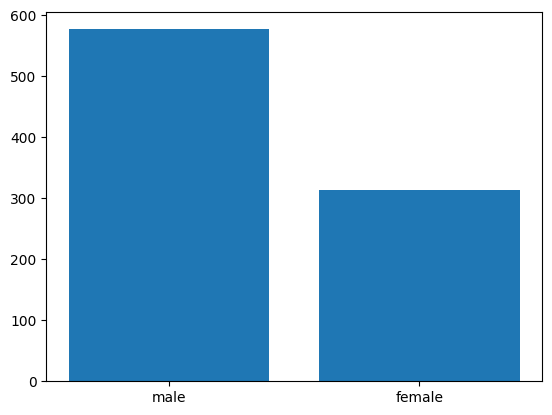

In [65]:
gender = train["Sex"].value_counts()
plt.bar(gender.index, gender.values)

In [92]:
survive = train[train.Survived == 1]
not_survive = train[train.Survived == 0]

percent_survive_class_1 = survive[survive.Pclass == 1].shape[0] / train[train.Pclass == 1].shape[0]
percent_survive_class_2 = survive[survive.Pclass == 2].shape[0] / train[train.Pclass == 2].shape[0]
percent_survive_class_3 = survive[survive.Pclass == 3].shape[0] / train[train.Pclass == 3].shape[0]

<BarContainer object of 3 artists>

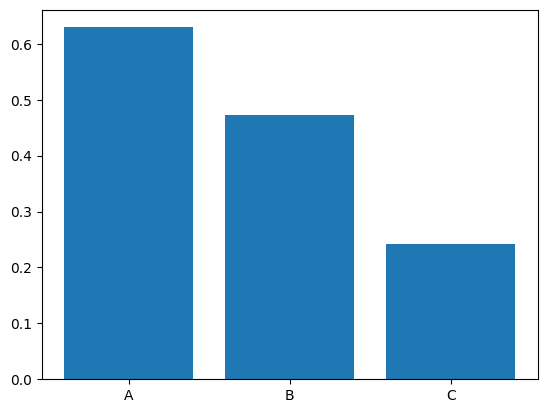

In [93]:
plt.bar(['A', 'B', 'C'], [percent_survive_class_1, percent_survive_class_2, percent_survive_class_3])

In [94]:
percent_survive_male = survive[survive.Sex == 'male'].shape[0] / train[train.Sex == 'male'].shape[0]
percent_survive_female = survive[survive.Sex == 'female'].shape[0] / train[train.Sex == 'female'].shape[0]

<BarContainer object of 2 artists>

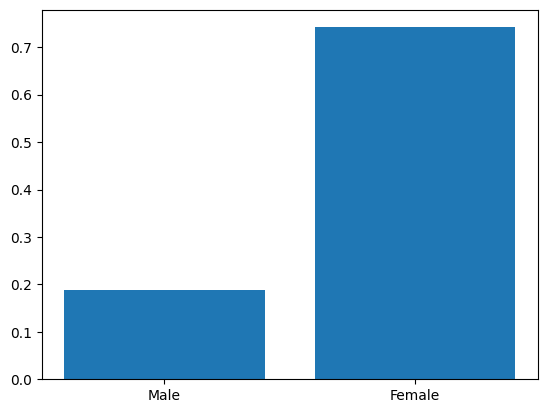

In [95]:
plt.bar(["Male", "Female"], [percent_survive_male, percent_survive_female])

In [96]:
corr_matrix = train.corr(numeric_only=True)
corr_matrix["Survived"]

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64